# Introduction to Statistics Project :  E-news Express

### Problem Statement

### Description

### Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting news electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express believe that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to decide to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

### Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content compared to the old page. To test the effectiveness of the new landing page in gathering new subscribers, the Data Science team experimented by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?

### Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

* **user_id**: Unique user ID of the person visiting the website
* **group** : Whether the user belongs to the first group (control) or the second group (treatment)
* **landing_page** :Whether the landing page is new or old
* **time_spent_on_the_page**: Time (in minutes) spent by the user on the landing page
* **converted** : Whether the user gets converted to a subscriber of the news portal or not
* **language_preferred** : language chosen by the user to view the landing page

### Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
%matplotlib inline

### Understanding the structure of the data

In [2]:
data=pd.read_csv("C:\\Users\\punith yc\\Downloads\\abtest.csv")

In [3]:
#checking the first 5 rows
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [4]:
#checking the last 5 rows of data
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [5]:
#check the shape of the dataset
data.shape

(100, 6)

#### Observations: 
 There are 1000 rows and 6 columns in the data

In [6]:
#checking the datatypes of different columns in the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observations: 
There are 4 object columns, 1 integer column and 1 object and all the columns dont have any null values and there are no duplicates in the data which means all the values are unique

In [7]:
#summary statistics of the numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,100.0,546517.0000,52.295779,546443.00,546467.75,546492.500,546567.2500,546592.00
time_spent_on_the_page,100.0,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71


#### Observations: 
1. The average time spent on page is 5.37 mins with a standard deviation of 2.37 mins
2. The interquartile range (IQR) is from 3.88 to 7.02 minutes, meaning that 50% of users spent between 3.88 and 7.02 minutes on the page.
3. The min time taken by users is 0.19 mins and the max time taken by users is 10.71 minutes
4. The median time spent by users is 5.41

In [8]:
#checking the missing values
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observations: 
As there are no null values in the data across all the columns, so its not required to handle the missing values in the data

In [9]:
#duplicates in data
data.duplicated().sum()

0

#### Observations: 
As there are no duplicate values in the data across all the columns, so its not required to handle the duplicate values in the data

### Exploratory Data Analysis(EDA)

#### Univariate Analysis

In [10]:
data['user_id'].nunique()

100

#### Observations: 
There are 100 unique users in the data

In [11]:
data['group'].nunique()

2

#### Observations: 
There are 2 unique groups in the data, they are control and treatment

In [12]:
data['language_preferred'].nunique()

3

#### Observations: 
There are 3 unique groups in the data, they are English,Spanish and French

In [13]:
data['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

#### Observations: 
From the above data we can understand that there are 34 users who prefer Spanish,34 users who prefer French and 32 users who prefer English

In [14]:
data['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

#### Observations: 
From the above we can understand that there are 50 users who prefer first group(control) and 50 users who prefer second group(treatment)

In [15]:
data['landing_page'].value_counts()

old    50
new    50
Name: landing_page, dtype: int64

#### Observations: 
From this we can understand that 50 users visited and new page and 50 users visited on old page

In [16]:
data['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

#### Observations: 
This indicates that 54 users converted to a subscriber of the news portal while 46 users are not converted.

### which language users have the highest average time spent ?

In [17]:
avg_time=data.groupby('language_preferred')['time_spent_on_the_page'].mean().sort_values(ascending=False).head(1)
avg_time

language_preferred
English    5.559062
Name: time_spent_on_the_page, dtype: float64

#### Observations: 
The customers who prefers english have the highest average time spent than the users who prefer other languages

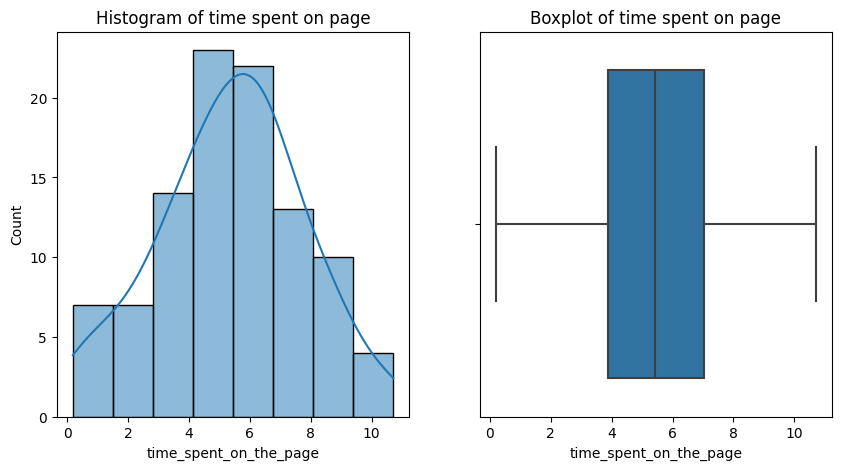

In [18]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data,x='time_spent_on_the_page',kde=True)
plt.title("Histogram of time spent on page")
plt.subplot(1,2,2)
sns.boxplot(data,x='time_spent_on_the_page')
plt.title("Boxplot of time spent on page")
plt.show()

#### Observations: 
From the above plot we can see that the data follows a normal distribution which is symmetrical in nature and there are no outliers in the data which indicates a balanced engagement among the users

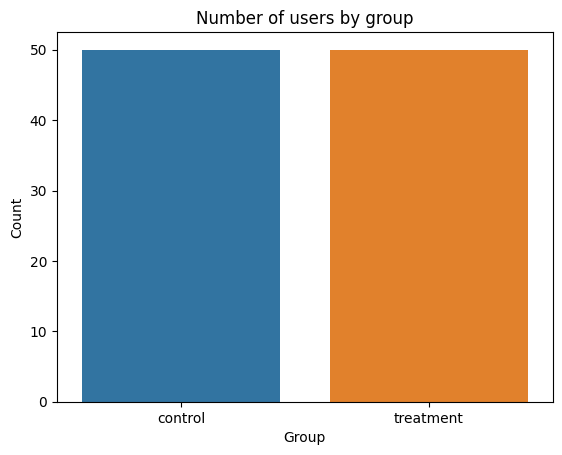

In [19]:
#users by group
sns.countplot(data,x="group")
plt.title("Number of users by group")
plt.xlabel("Group")
plt.ylabel("Count")
plt.show()

#### Observations: 
From the above we can understand that there are 50 users who prefer first group(control) and 50 users who prefer second group(treatment)

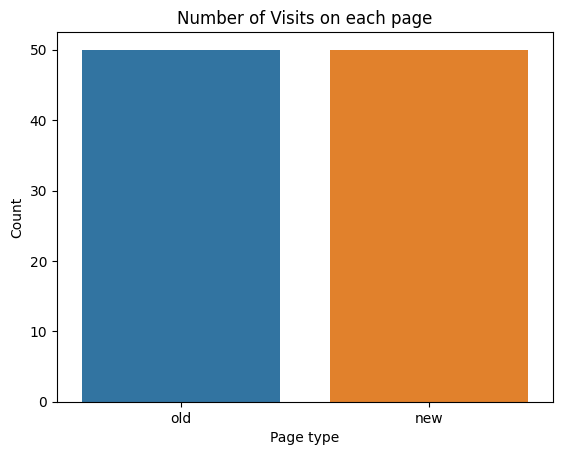

In [20]:
#count of visits on each page
sns.countplot(data,x="landing_page")
plt.title("Number of Visits on each page")
plt.xlabel("Page type")
plt.ylabel("Count")
plt.show()

#### Observations: 
From this we can understand that 50 users visited and new page and 50 users visited on old page

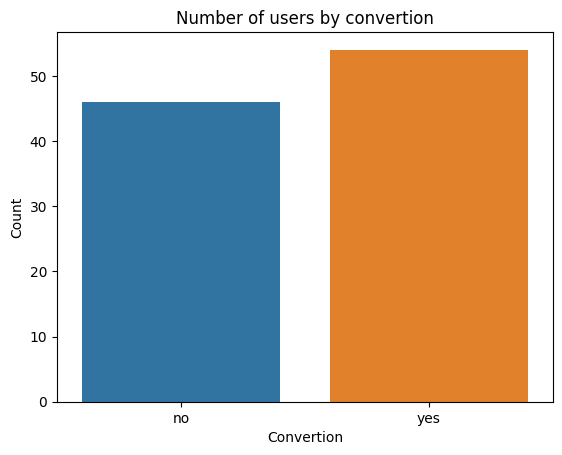

In [21]:
#no of users by convertion
sns.countplot(data,x="converted")
plt.title("Number of users by convertion")
plt.xlabel("Convertion")
plt.ylabel("Count")
plt.show()

#### Observations: 
The plot indicates that 54 users converted to a subscriber of the news portal while 46 users are not converted

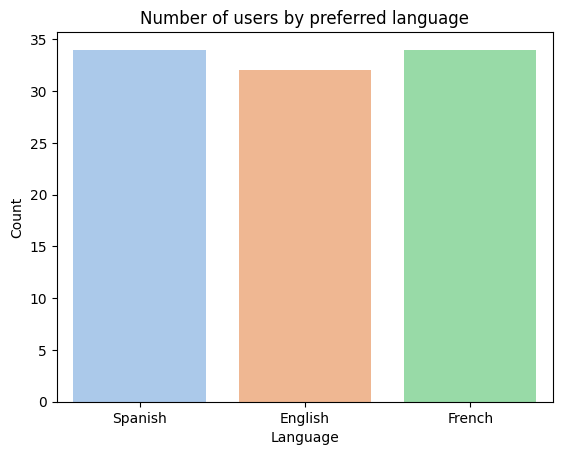

In [22]:
#number of users by language
sns.countplot(data,x='language_preferred',palette='pastel')
plt.title("Number of users by preferred language")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

#### Observations: 
The data says that there are 34 users who prefer Spanish,34 users who prefer French and 32 users who prefer English

#### Bivariate Analysis

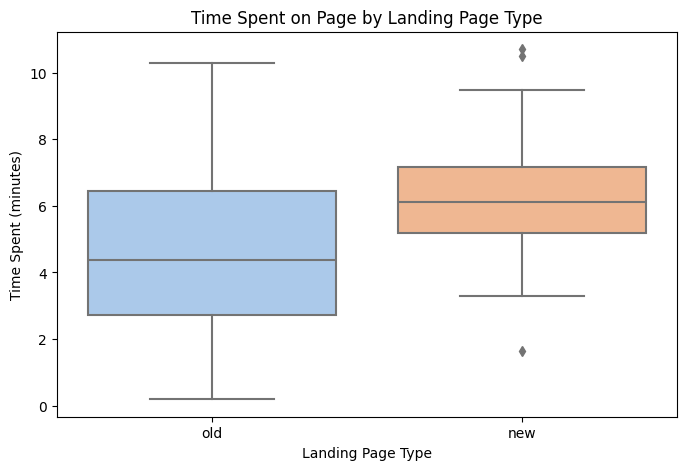

In [23]:
#box plot for Time Spent on Page by Landing Page Type
plt.figure(figsize=(8, 5))
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=data, palette='pastel')
plt.title('Time Spent on Page by Landing Page Type')
plt.xlabel('Landing Page Type')
plt.ylabel('Time Spent (minutes)')
plt.show()


#### Observations: 
1. The median time spent by the users on old page is lower compared to the median time spent by the users on the new page
2. 50% of users spent the time on old page is nearly beteween 2 and 8 mins, 50% of users spent time on new page is nearly between 4 and 8 mins
3. There is outliers in time spent on old page but the new page have some outliers

In [24]:
#mean time spent by users
data['time_spent_on_the_page'].mean()

5.377800000000001

#### Observations: 
The mean time spent by the users is 5.37 mins

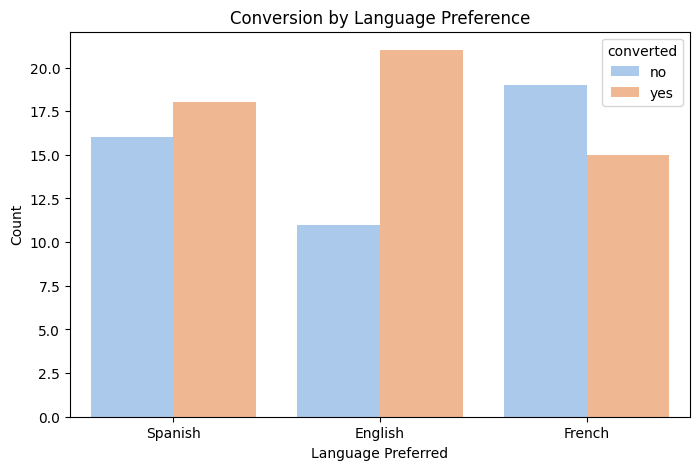

In [25]:
# Conversion Rates by Language Preference
plt.figure(figsize=(8, 5))
sns.countplot(x='language_preferred', hue='converted', data=data, palette='pastel')
plt.title('Conversion by Language Preference')
plt.xlabel('Language Preferred')
plt.ylabel('Count')
plt.show()


#### Observations: 
1. The people who prefers english have the highest conversions to the news portal subscriber followed by the users who prefer spanish
2. The people who prefers french has the lowest conversions to the to the news portal subscriber

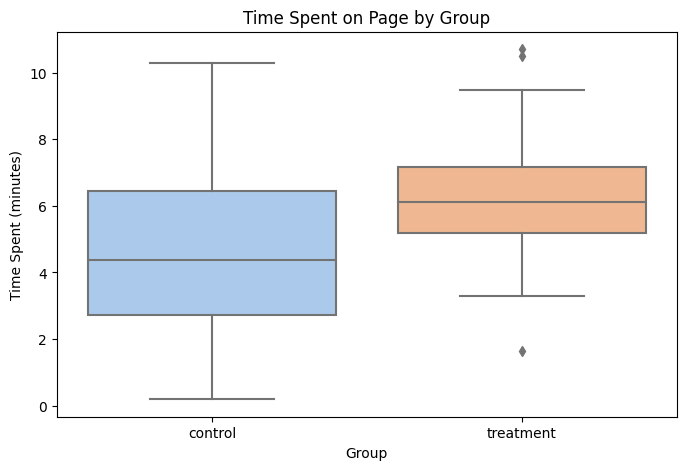

In [26]:
# Time Spent on Page by Group
plt.figure(figsize=(8, 5))
sns.boxplot(x='group', y='time_spent_on_the_page', data=data, palette='pastel')
plt.title('Time Spent on Page by Group')
plt.xlabel('Group')
plt.ylabel('Time Spent (minutes)')
plt.show()


#### Observations: 
1. The median time spent by the users who belong to first group(control) is nearly 5 mins and the median time spent by users belong to second group(treatment) is nearly 7 mins
2. 50% users who belong to first group spent time in between 3 and 7(mins) and 50% users belong to second group spent time in between 5  and 8(mins)

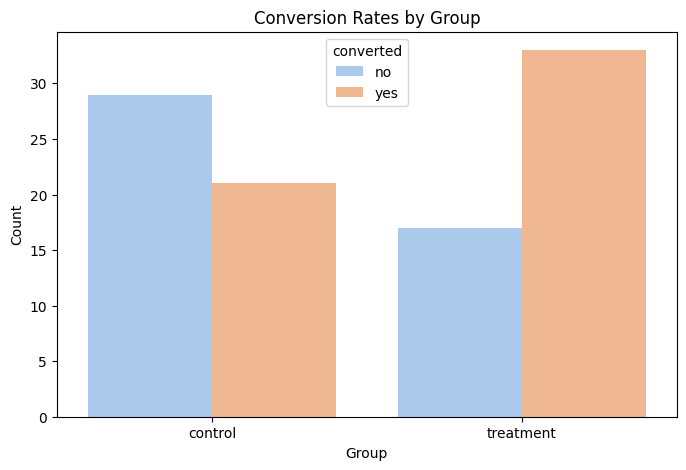

In [27]:
# Conversion Rates by Group
plt.figure(figsize=(8, 5))
sns.countplot(x='group', hue='converted', data=data, palette='pastel')
plt.title('Conversion Rates by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()


#### Observations: 
1. The users who belong to second group(treatment) has highest conversions to a news portal subscriber compared to the first group(control)

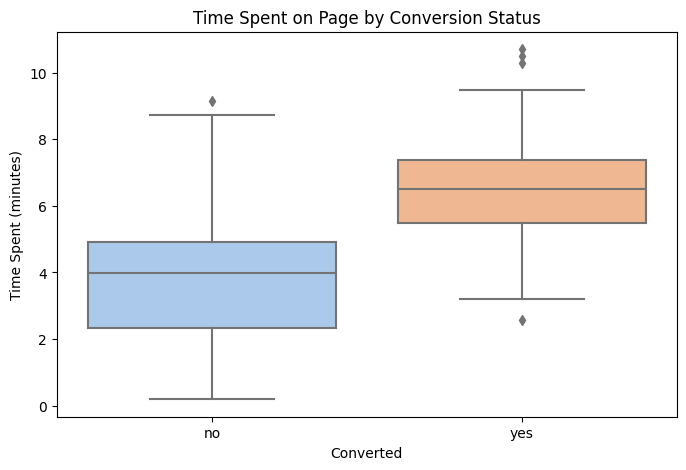

In [28]:
# Time Spent on Page by Conversion Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='converted', y='time_spent_on_the_page', data=data, palette='pastel')
plt.title('Time Spent on Page by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Time Spent (minutes)')
plt.show()


#### Observations: 
1. The users who converted to a subscriber of news portal has high median time spent than the users who didnt converted.
2. 50% users who didnt converted spent the time in between 2 and 5(mins) and 50% of users who converted spent the time in between 5 and 8(mins)

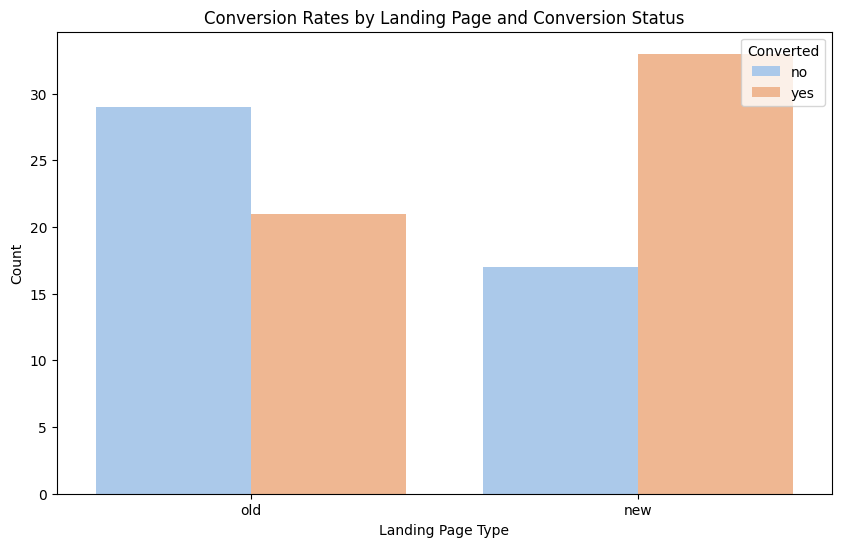

In [29]:
# Conversion Rates by Landing Page Type and Group
plt.figure(figsize=(10, 6))
sns.countplot(x='landing_page', hue='converted', data=data, palette='pastel', dodge=True)
plt.title('Conversion Rates by Landing Page and Conversion Status')
plt.xlabel('Landing Page Type')
plt.ylabel('Count')
plt.legend(title='Converted', loc='upper right')
plt.show()


 #### Observations: 
The new landing page has a higher conversion rate compared to the old landing page. And, there are fewer non-converted users on the new page than on the old page,it suggests improved performance on the new landing page

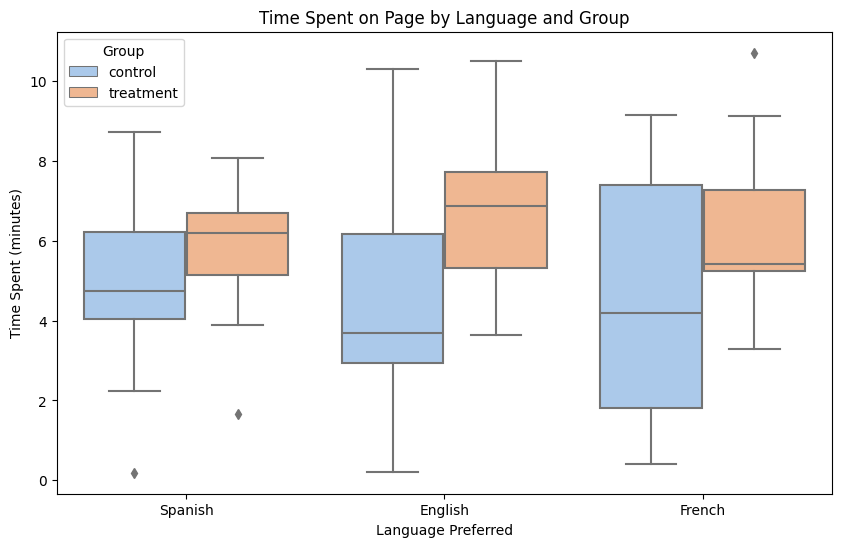

In [30]:
# Time Spent on Page by Language and Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', hue='group', data=data, palette='pastel')
plt.title('Time Spent on Page by Language and Group')
plt.xlabel('Language Preferred')
plt.ylabel('Time Spent (minutes)')
plt.legend(title='Group')
plt.show()


#### Observations: 
1. The median time spent by the users who prefers english and belongs to 2 group spent more time than the other users
2. The median time spent by the users who belong to first group and prefers spanish spent more time than the others 
3. The median time spent by the users who belong to first group and prefers english spent time than the others
4. The median time spent by the users who prefers french and belongs to 2 group spent less time than the other users
5. the highest time spent by the users who prefers english

### 1. Do the users spend more time on the new landing page than on the existing landing page?

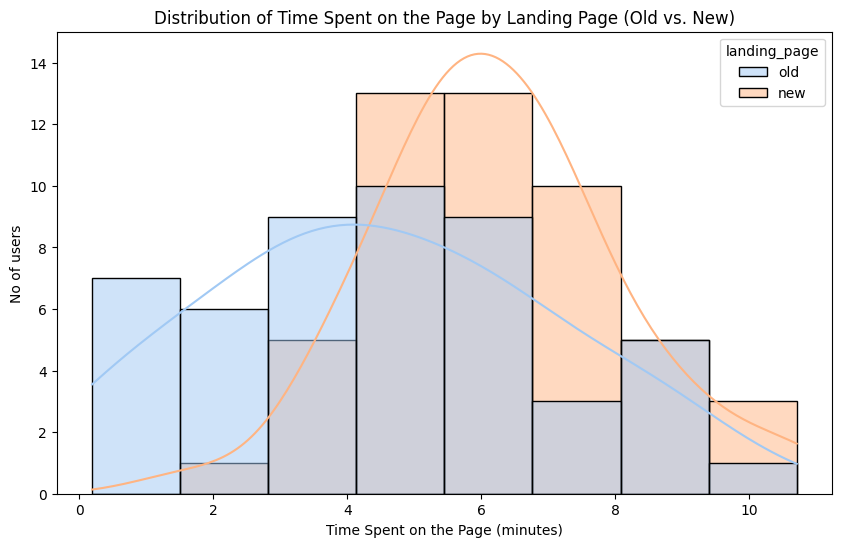

In [31]:
#Histogram for time spent by landing page
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='time_spent_on_the_page', hue='landing_page', kde=True, palette="pastel")
plt.title("Distribution of Time Spent on the Page by Landing Page (Old vs. New)")
plt.xlabel("Time Spent on the Page (minutes)")
plt.ylabel("No of users")
plt.show()

#### Defining the null and alternative hypothesis
The test is to find the whether the users spend more time on the new landing page than the old landing page.

Testing the null hypothesis
>$H_0:\mu_{new}≤\mu_{old}$
 
against the alternate hypothesis
>$H_1:\mu_{new}>\mu_{old}$

**Checking for the normality and the equal/not equal variances**

In [32]:
time_old = data[data['landing_page'] == 'old']['time_spent_on_the_page']
time_new = data[data['landing_page'] == 'new']['time_spent_on_the_page']

In [33]:
# Normality test (Shapiro-Wilk)
from scipy.stats import ttest_ind, shapiro, levene
p_value_old_normality = shapiro(time_old)
p_value_new_normality = shapiro(time_new)
print("P-Value for Normality (Old Page):", p_value_old_normality)
print("P-Value for Normality (New Page):", p_value_new_normality)


P-Value for Normality (Old Page): ShapiroResult(statistic=0.9776089191436768, pvalue=0.45611920952796936)
P-Value for Normality (New Page): ShapiroResult(statistic=0.9857664704322815, pvalue=0.8040016293525696)


since the p value is large we fail to reject the null hypothesis which means it follows the  normal distribution

In [34]:
# Equal Variance test (Levene's test)
p_value_variance = levene(time_old, time_new)
print("P-Value for Equal Variances:", p_value_variance)

P-Value for Equal Variances: LeveneResult(statistic=7.113724153407544, pvalue=0.008950671168914428)


Since the p-value (0.00895) is less than 0.05, we reject the null hypothesis, which means we have sufficient evidence to conclude that the variances are significantly different between the groups.

#### Checking for the assumptions
* Observations from the old and new landing pages are independent as we are taking samples for two different groups
* The variances of time spent on the old and new pages aren't equal and it is checked by the levene's test so we use the parameter equal_var="False"
* The population is normally distributed, this assumptions is checked by the shapiro wilk test
* Random sampling from the population - Yes, we are informed that the collected sample a simple random sample.

In [35]:
#calculating p value
#Two Independent Sample T-test for Equality of Means - Unequal Std Dev
t_stat, p_value = ttest_ind(time_new, time_old,equal_var=False, alternative='greater')
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 3.7867702694199856
P-Value: 0.0001392381225166549


#### Observations: 
since p value<0.05 We have enough statistical evidence to reject the null hypothesis, indicating that users spend more time on the new landing page than on the existing landing page.

### 2. Is the conversion rate for the new page greater than for the old page?

**Defining the null and alternate hypothesis**

Testing the null hypothesis 
>$H_0: p_{new} ≤ p_{old}$

against the alternate hypothesis 
>$H_1: p_{new} > p_{old}$


Conversion Rate Proportion:
 yes    0.54
no     0.46
Name: converted, dtype: float64


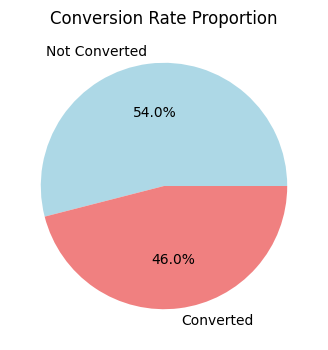

In [36]:
conversion_proportion = data['converted'].value_counts(normalize=True)
print("Conversion Rate Proportion:\n", conversion_proportion)

# Visualization of Conversion Rate Proportion
plt.figure(figsize=(6, 4))
conversion_proportion.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], labels=['Not Converted', 'Converted'])
plt.title('Conversion Rate Proportion')
plt.ylabel('')
plt.show()

In [37]:
# Conversion counts
convert_old = data[(data['landing_page'] == 'old') & (data['converted'] == 'yes')].shape[0]
convert_new = data[(data['landing_page'] == 'new') & (data['converted'] == 'yes')].shape[0]

# Total visits
total_old = data[data['landing_page'] == 'old'].shape[0]
total_new = data[data['landing_page'] == 'new'].shape[0]

**checking for the assumptions**

* Binomally distributed population - Yes, the conversion is binary outcome ("yes" or "no")
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [38]:
#calculating p value
#one proportion z test
from statsmodels.stats.proportion import proportions_ztest
count = [convert_new, convert_old]
nobs = [total_new, total_old]
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')
print("Z-Statistic:", z_stat)
print("P-Value:", p_value)

Z-Statistic: 2.4077170617153842
P-Value: 0.008026308204056278


#### Observations: 
Since p_value < 0.05, We have enough statistical evidence to reject the null hypothesis, indicating that the new landing page has a significantly higher conversion rate than the old page.

### 3. Does the converted status depend on the preferred language?

**Defining the null and alternate hypothesis**

Testing the null hypothesis
>$H_0:$ Converted status is independent of the preferred language.

against the null hypothesis
>$H_1:$ Converted status depends on the preferred language.

In [39]:
from scipy.stats import chi2_contingency

# Contingency table
contingency_table = pd.crosstab(data['language_preferred'], data['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


**Checking whether the assumptions are satisfied or not**
* Categorical variables - Yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

In [40]:
#calculating the p value
#chi square test for independence
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2_stat)
print("P-Value:", p_value)

Chi-Square Statistic: 3.0930306905370832
P-Value: 0.2129888748754345


#### Observations: 
Since 𝑝-value>0.05, we fail to reject the null hypothesis. Therefore, we do not have enough statistical evidence to conclude that converted status is dependent on the preferred language.



**Defining the null and alternate hypothesis**

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ Mean time spent is different in at least one language from the rest

### 4. Is the mean time spent on the new page same for the different language users?

In [41]:
# Filter data for users on the new page
new_page_data = data[data['landing_page'] == 'new']

# Time spent by each language group
time_english = new_page_data[new_page_data['language_preferred'] == 'English']['time_spent_on_the_page']
time_spanish = new_page_data[new_page_data['language_preferred'] == 'Spanish']['time_spent_on_the_page']
time_french = new_page_data[new_page_data['language_preferred'] == 'French']['time_spent_on_the_page']

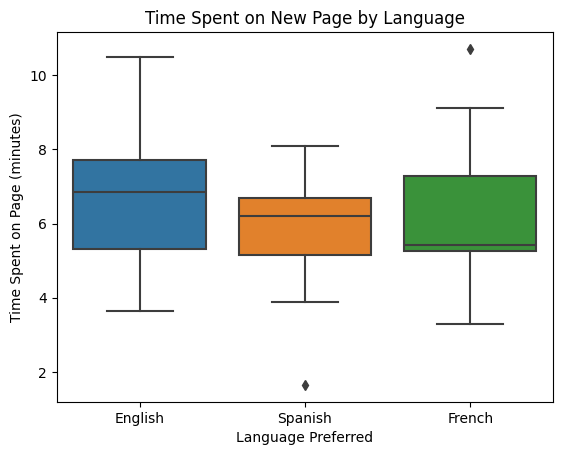

In [42]:
sns.boxplot(data=new_page_data, x='language_preferred', y='time_spent_on_the_page')
plt.title("Time Spent on New Page by Language")
plt.xlabel("Language Preferred")
plt.ylabel("Time Spent on Page (minutes)")
plt.show()


In [43]:
#Check Normality for each language group
p_english_normality = shapiro(time_english)
p_spanish_normality = shapiro(time_spanish)
p_french_normality = shapiro(time_french)
print("P-Value for Normality (English):", p_english_normality)
print("P-Value for Normality (Spanish):", p_spanish_normality)
print("P-Value for Normality (French):", p_french_normality)


P-Value for Normality (English): ShapiroResult(statistic=0.9731259942054749, pvalue=0.8863451480865479)
P-Value for Normality (Spanish): ShapiroResult(statistic=0.9072974920272827, pvalue=0.09006832540035248)
P-Value for Normality (French): ShapiroResult(statistic=0.9402673244476318, pvalue=0.3213688135147095)


Since p-value of the test is very large, we fail to reject the null hypothesis that the response follows the normal distribution.

In [44]:
# Check Equal Variance (Levene's Test)
p_variance = levene(time_english, time_spanish, time_french)
print("P-Value for Equal Variances:", p_variance)

P-Value for Equal Variances: LeveneResult(statistic=0.7736446756800186, pvalue=0.46711357711340173)


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

**Testing whether the assumptions are satisfied or not**

* The populations are normally distributed - Yes, the normality assumption is verified using the Shapiro-Wilk’s test.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.
* Samples are independent as we are taking samples for three different groups

In [45]:
#calculating p-value
#performing one way Anova test
from scipy.stats import f_oneway
f_stat, p_value = f_oneway(time_english, time_spanish, time_french)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

F-Statistic: 0.854399277000682
P-Value: 0.43204138694325955


#### Observations: 
Since p-value>α  we fail to reject the null hypothesis.Therefore, we do not have enough statistical evidence to conclude that the mean time spent is different in at least one language from the others.

### Conclusions:

* Users in the treatment group spent more time on the page which indicates potential success for new design but the conversions are not that much high
* The treatment group(new design) shows a stronger conversion pattern than the control(old design)
* The average time spent is moderate which indiactes the room for improvement
* The treatment group shows a slightly higher conversion rate tahn the control group


### Recommendations
* Identifying and reducing the problems in the treatment group to maximize the conversion rates which benefits the new design
* Improving the page content to boost the engagement
* Trying multiple layouts within the treatment group to find an optimal design
* using insights from user behaviour by language and time on page to recommend the content 